# EDA Practice Case for IYKRA Data Fellowship 6

## Scenario
Looking back at the season that was 2018-2019 and looking to delve into sight deeper insights. Using the data to see how clubs are similar stylistically, in the way they pass, attack and score goals. 

In [1]:
# Importing libraries and data
import io
import requests
import pandas as pd

url = "https://raw.githubusercontent.com/Syukrondzeko/Fellowship/main/epl_1819.csv"
dataset = requests.get(url).content
df = pd.read_csv(io.StringIO(dataset.decode('utf-8')))

In [7]:
df.head()

,Team,category,general_league_position,finance _live_games_televised,finance _tv_revenue,general_matches_played,general_won,general_draw,general_lost,attack_scored,...,defence_saves,defence_blocks,defence_interceptions,defence_tackles,defence_tackles_last_man,defence_clearances,defence_clearances_headed,defence_penalty_conceeded,attack_posession,attack_pass_accuracy
0,Manchester City,Champions League,1,26,150986355,38,32,2,4,95,...,58,63,362,518,0,543,295,4,64.0,89.0
1,Liverpool,Champions League,2,29,152425146,38,30,7,1,89,...,76,78,314,610,2,639,317,1,58.8,84.4
2,Chelsea,Champions League Qualification,3,25,146030216,38,21,9,8,63,...,85,73,351,618,2,593,330,2,59.9,87.6
3,Tottenham,Champions League Qualification,4,26,145230801,38,23,2,13,67,...,121,112,326,626,3,770,411,5,56.7,83.2
4,Arsenal,Europa League,5,25,142193180,38,21,7,10,73,...,133,118,412,609,2,762,404,7,56.1,83.3


### Is the data clean?

In [2]:
# Check for missing values
df.isnull().sum()

Team                             0
category                         0
general_league_position          0
finance _live_games_televised    0
finance _tv_revenue              0
general_matches_played           0
general_won                      0
general_draw                     0
general_lost                     0
attack_scored                    0
defence_goals_conceeded          0
general_goal_difference          0
general_points                   0
general_squad_size               0
general_squad_average_age        0
general_squad_foreigners         0
finance _team_market             0
finance _market_average          0
attack_passes                    0
attack_passes_through            0
attack_passes_long               0
attack_passes_back               0
attack_crosses                   0
attack_corners_taken             0
attack_shots                     0
attack_shots_on_target           0
attack_goals_headed              0
attack_goals_penalty             0
attack_goals_box    

In [6]:
# Check data types
df.dtypes

Team                              object
category                          object
general_league_position            int64
finance _live_games_televised      int64
finance _tv_revenue                int64
general_matches_played             int64
general_won                        int64
general_draw                       int64
general_lost                       int64
attack_scored                      int64
defence_goals_conceeded            int64
general_goal_difference            int64
general_points                     int64
general_squad_size                 int64
general_squad_average_age        float64
general_squad_foreigners           int64
finance _team_market               int64
finance _market_average            int64
attack_passes                     object
attack_passes_through              int64
attack_passes_long                object
attack_passes_back                object
attack_crosses                     int64
attack_corners_taken               int64
attack_shots    

In [8]:
# Some columns supposed to be numerical, but have object type instead
# Convert data types

cols_str = ['attack_passes', 'attack_passes_long', 'attack_passes_back', 'defence_clearances']
for col in cols_str:
    df[col] = df[col].replace({',':''}, regex=True).astype('int64')
    
df.dtypes

Team                              object
category                          object
general_league_position            int64
finance _live_games_televised      int64
finance _tv_revenue                int64
general_matches_played             int64
general_won                        int64
general_draw                       int64
general_lost                       int64
attack_scored                      int64
defence_goals_conceeded            int64
general_goal_difference            int64
general_points                     int64
general_squad_size                 int64
general_squad_average_age        float64
general_squad_foreigners           int64
finance _team_market               int64
finance _market_average            int64
attack_passes                      int64
attack_passes_through              int64
attack_passes_long                 int64
attack_passes_back                 int64
attack_crosses                     int64
attack_corners_taken               int64
attack_shots    

## Point Distribution

# import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.hist(data=df, x='general_points')
plt.xlabel("Points")
plt.ylabel("Count")
plt.title("Point Distribution PL Team in 2017/2018")
plt.show()

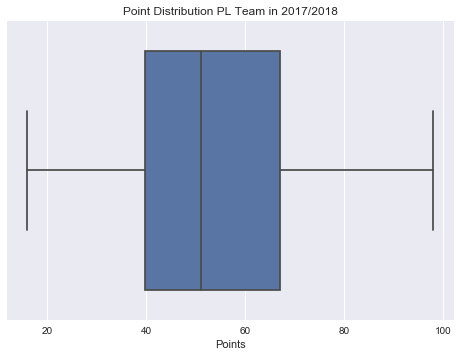

In [71]:
import seaborn as sns
# sns.histplot(data=df, x='general_points')
sns.boxplot(data=df, x='general_points')
plt.xlabel("Points")
plt.title("Point Distribution PL Team in 2017/2018")
plt.show()

## Team with the best attack

In [25]:
# Separate the data from attack data
object_columns = ['Team', 'category']

# Getting attack data
attack_columns = [i for i in df.columns if "attack" in i]
df_attack = df[attack_columns]

In [27]:
# Divide attack data by matches played
for col in attack_columns:
    df_attack[col] = df_attack[col] / df["general_matches_played"]

C:\Users\asus\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [29]:
# Scaling the data, so all data have range of 0-1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df_attack)
scaled = scaler.transform(df_attack)
df_attack_scaled = pd.DataFrame(scaled, columns = attack_columns)

In [30]:
df_attack_scaled.head()

,attack_scored,attack_passes,attack_passes_through,attack_passes_long,attack_passes_back,attack_crosses,attack_corners_taken,attack_shots,attack_shots_on_target,attack_goals_headed,attack_goals_penalty,attack_goals_box,attack_goals_outsidebox,attack_goals_counter,attack_goals_freekick,attack_posession,attack_pass_accuracy
0,1.000000,1.000000,0.740458,0.035587,1.000000,0.876984,1.000000,1.000000,1.000000,0.533333,0.222222,0.940299,1.000000,0.555556,0.666667,1.000000,1.000000
1,0.917808,0.820055,0.633588,0.423488,0.708009,0.630952,0.689873,0.665635,0.776316,1.000000,0.666667,1.000000,0.285714,0.666667,0.333333,0.791165,0.816733
2,0.561644,0.907612,1.000000,0.000000,0.870305,0.515873,0.474684,0.764706,0.592105,0.266667,0.444444,0.552239,0.571429,0.111111,0.333333,0.835341,0.944223
3,0.616438,0.676796,0.549618,0.438612,0.628278,0.321429,0.341772,0.547988,0.532895,0.666667,0.333333,0.537313,0.928571,0.555556,0.666667,0.706827,0.768924
4,0.698630,0.646836,0.381679,0.256228,0.596740,0.170635,0.436709,0.331269,0.407895,0.066667,0.333333,0.671642,0.714286,0.333333,1.000000,0.682731,0.772908


In [31]:
# Re-join attack data and team names
df_team = df[object_columns]
df_attack_team = pd.concat([df_team, df_attack_scaled], axis=1)

In [76]:
# Get overall attack of every team by averaging the data
df_attack_team["overall_attack"] = df_attack_scaled.mean(axis=1)

In [82]:
# Showing team with the best attack
df_attack_team.sort_values(by="overall_attack", ascending=False).head(1)

,Team,category,attack_scored,attack_passes,attack_passes_through,attack_passes_long,attack_passes_back,attack_crosses,attack_corners_taken,attack_shots,attack_shots_on_target,attack_goals_headed,attack_goals_penalty,attack_goals_box,attack_goals_outsidebox,attack_goals_counter,attack_goals_freekick,attack_posession,attack_pass_accuracy,overall_attack
0,Manchester City,Champions League,1.0,1.0,0.740458,0.035587,1.0,0.876984,1.0,1.0,1.0,0.533333,0.222222,0.940299,1.0,0.555556,0.666667,1.0,1.0,0.7983


In [83]:
df_attack_team.loc[df_attack_team["Team"]=="Southampton"]

,Team,category,attack_scored,attack_passes,attack_passes_through,attack_passes_long,attack_passes_back,attack_crosses,attack_corners_taken,attack_shots,attack_shots_on_target,attack_goals_headed,attack_goals_penalty,attack_goals_box,attack_goals_outsidebox,attack_goals_counter,attack_goals_freekick,attack_posession,attack_pass_accuracy,overall_attack
15,Southampton,No UEFA Competitions,0.315068,0.248915,0.152672,0.551601,0.220411,0.404762,0.335443,0.380805,0.355263,0.0,0.333333,0.208955,0.928571,0.111111,1.0,0.253012,0.40239,0.364842


## Team with the best defence

In [45]:
# Separate defence columns to defence_plus and defence_minus
defence_plus = [i for i in df.columns if "defence" in i and "conceeded" not in i]
defence_minus = [i for i in df.columns if "defence" in i and "conceeded" in i]

defence_columns = defence_plus + defence_minus
df_defence = df[defence_columns]

# Multiply all conceeded columns by -1 since it means bad defence
df_defence[defence_minus] = 1/df_defence[defence_minus]

C:\Users\asus\anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [46]:
df_defence.head()

,defence_saves,defence_blocks,defence_interceptions,defence_tackles,defence_tackles_last_man,defence_clearances,defence_clearances_headed,defence_goals_conceeded,defence_penalty_conceeded
0,58,63,362,518,0,543,295,0.043478,0.250000
1,76,78,314,610,2,639,317,0.045455,1.000000
2,85,73,351,618,2,593,330,0.025641,0.500000
3,121,112,326,626,3,770,411,0.025641,0.200000
4,133,118,412,609,2,762,404,0.019608,0.142857


In [47]:
# Divide defence data by matches played
for col in defence_columns:
    df_defence[col] = df_defence[col] / df["general_matches_played"]

df_defence.head()

C:\Users\asus\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,defence_saves,defence_blocks,defence_interceptions,defence_tackles,defence_tackles_last_man,defence_clearances,defence_clearances_headed,defence_goals_conceeded,defence_penalty_conceeded
0,1.526316,1.657895,9.526316,13.631579,0.000000,14.289474,7.763158,0.001144,0.006579
1,2.000000,2.052632,8.263158,16.052632,0.052632,16.815789,8.342105,0.001196,0.026316
2,2.236842,1.921053,9.236842,16.263158,0.052632,15.605263,8.684211,0.000675,0.013158
3,3.184211,2.947368,8.578947,16.473684,0.078947,20.263158,10.815789,0.000675,0.005263
4,3.500000,3.105263,10.842105,16.026316,0.052632,20.052632,10.631579,0.000516,0.003759


In [48]:
# Scale the data so the data have range of 0-1
scaler = MinMaxScaler()
scaler.fit(df_defence)
scaled = scaler.transform(df_defence)
df_defence_scaled = pd.DataFrame(scaled, columns = defence_columns)
df_defence_scaled.head()

,defence_saves,defence_blocks,defence_interceptions,defence_tackles,defence_tackles_last_man,defence_clearances,defence_clearances_headed,defence_goals_conceeded,defence_penalty_conceeded
0,0.000000,0.000000,0.205128,0.000000,0.000,0.000000,0.154088,0.940310,0.166667
1,0.200000,0.094340,0.000000,0.433962,0.250,0.166378,0.223270,1.000000,1.000000
2,0.300000,0.062893,0.158120,0.471698,0.250,0.086655,0.264151,0.401565,0.444444
3,0.700000,0.308176,0.051282,0.509434,0.375,0.393414,0.518868,0.401565,0.111111
4,0.833333,0.345912,0.418803,0.429245,0.250,0.379549,0.496855,0.219342,0.047619


In [49]:
# Re-join defence data with respective teams
df_defence_team = pd.concat([df_team, df_defence_scaled], axis=1)

# Find overall defence by averaging all data
df_defence_team["overal_defence"] = df_defence_team.mean(axis=1)

In [50]:
# Showing team with best defence
df_defence_team.sort_values(by="overal_defence", ascending=False).head(1)

,Team,category,defence_saves,defence_blocks,defence_interceptions,defence_tackles,defence_tackles_last_man,defence_clearances,defence_clearances_headed,defence_goals_conceeded,defence_penalty_conceeded,overal_defence
15,Southampton,No UEFA Competitions,0.622222,0.566038,1.0,0.853774,0.5,0.909879,0.805031,0.091786,0.259259,0.62311


## Team with good financial aspect

In [70]:
finance_columns = [i for i in df.columns if "finance" in i]
df_finance = df[finance_columns]
df_finance

,finance _live_games_televised,finance _tv_revenue,finance _team_market,finance _market_average
0,26,150986355,1003200000,39987200
1,29,152425146,836440000,34848000
2,25,146030216,779460000,29981600
3,26,145230801,735240000,29409600
4,25,142193180,701800000,26989600
5,27,142512868,550440000,22017600
6,15,127165114,369600000,16068800
7,18,128603905,305360000,11748000
8,15,123328078,284240000,10929600
9,16,122528663,234212000,9011200


In [42]:
# Scale the data so the data have range of 0-1
scaler = MinMaxScaler()
scaler.fit(df_finance)
scaled = scaler.transform(df_finance)
df_finance_scaled = pd.DataFrame(scaled, columns = finance_columns)
df_finance_scaled.head()

,finance _live_games_televised,finance _tv_revenue,finance _team_market,finance _market_average
0,0.842105,0.974213,1.000000,1.000000
1,1.000000,1.000000,0.818286,0.860853
2,0.789474,0.885388,0.756197,0.729092
3,0.842105,0.871060,0.708012,0.713605
4,0.789474,0.816619,0.671573,0.648082


In [43]:
# Re-join defence data with respective teams
df_finance_team = pd.concat([df_team, df_finance_scaled], axis=1)

# Find overall defence by averaging all data
df_finance_team["overal_finance"] = df_finance_team.mean(axis=1)

In [44]:
# Showing team with best defence
df_finance_team.sort_values(by="overal_finance", ascending=False).head(1)

,Team,category,finance _live_games_televised,finance _tv_revenue,finance _team_market,finance _market_average,overal_finance
0,Manchester City,Champions League,0.842105,0.974213,1.0,1.0,0.95408


## Additional Insights

In [51]:
attack_columns

['attack_scored',
 'attack_passes',
 'attack_passes_through',
 'attack_passes_long',
 'attack_passes_back',
 'attack_crosses',
 'attack_corners_taken',
 'attack_shots',
 'attack_shots_on_target',
 'attack_goals_headed',
 'attack_goals_penalty',
 'attack_goals_box',
 'attack_goals_outsidebox',
 'attack_goals_counter',
 'attack_goals_freekick',
 'attack_posession',
 'attack_pass_accuracy']

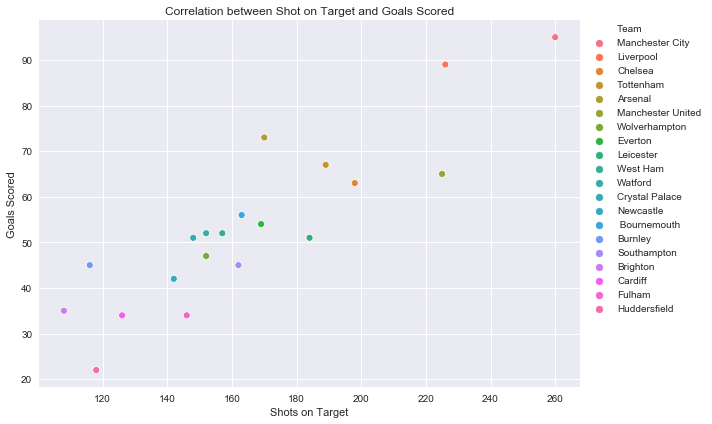

In [60]:
plt.figure(figsize=(10,6))

sns.scatterplot(x='attack_shots_on_target', y='attack_scored', data=df, hue="Team")
plt.xlabel("Shots on Target")
plt.ylabel("Goals Scored")

# place the legend outside the figure/plot
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)
plt.title("Correlation between Shot on Target and Goals Scored")
plt.tight_layout()